The first 3 Cells to Download the data and extracting it in google drive

In [0]:
!wget http://download.cs.stanford.edu/deep/MRNet-v1.0.zip

--2019-05-19 11:49:07--  http://download.cs.stanford.edu/deep/MRNet-v1.0.zip
Resolving download.cs.stanford.edu (download.cs.stanford.edu)... 171.64.64.22
Connecting to download.cs.stanford.edu (download.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6087523606 (5.7G) [application/zip]
Saving to: ‘MRNet-v1.0.zip’

MRNet-v1.0.zip      100%[===================>]   5.67G  17.5MB/s    in 5m 17s  

2019-05-19 11:54:24 (18.3 MB/s) - ‘MRNet-v1.0.zip’ saved [6087523606/6087523606]



In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!unzip -qq "/content/MRNet-v1.0.zip" -d "/content/gdrive/My Drive/MRNet Challenge/"

warning [/content/MRNet-v1.0.zip]:  4294967296 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  4294967296
  (attempting to re-compensate)
file #2547:  bad zipfile offset (local header sig):  1353202
  (attempting to re-compensate)


# Data Set Exploaration
This Cell to learn how to read an image from the data set .

you will find the images is saved as numpy array ,each image have a lot of different  copies may be 44 or 38 not a constant number .
The data set consist of videos not images .

to make it clear 
we will have a model with input of (number of photos in video*3*256*256)
why 3 ?i don't know 
we will make three different models
the csv files are the labels of the data 

note : cv2.imshow() function is not working just use cv2_imshow() 
the difference is the "."



In [0]:
import numpy as np
import cv2
import pandas as pd 
from google.colab.patches import cv2_imshow

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data1 = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train-abnormal.csv") 
print(data1.shape)

data2 = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train-acl.csv") 
print(data2.shape)

data3 = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train-meniscus.csv") 
print(data3.shape)
# print(data[0,0])
# print(type(data[0,0]))
a=np.load("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/0002.npy")
# print(a)
print(a.shape)
cv2_imshow(a[0])
cv2_imshow(a[1])
cv2_imshow(a[2])
cv2_imshow(a[3])
cv2_imshow(a[4])

# Reading the whole dataset
**be careful don't run this cell again it will take around 15 mins** 

1130
0
(256, 256)


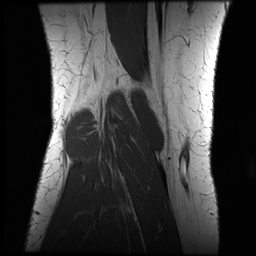

(256, 256, 3)


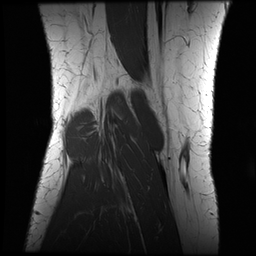

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


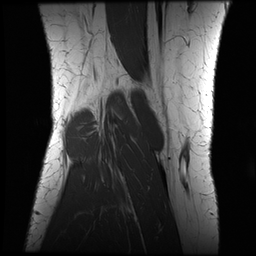

coronal read


In [0]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

def to_rgb(img,i):
    img = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

paths =[ "/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/"
        ,"/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/axial/","/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/sagittal/"]
all_data = []
for path in paths:
  directory=[]
  for r, d, f in os.walk(path):
      f = np.sort(f)
      for file in f:
          
          if '.npy' in file:
              directory.append(os.path.join(r, file))
  all_data.append(directory)
  

coronal=np.zeros(shape=(16649,256,256,3),dtype='uint8')
coronalList=[]
sizes=[]
k=0
for i in range(len(all_data[0])):
  print(i)
  a=np.load(all_data[0][i])
  f,j,k=a.shape
  sizes.append(f//2)
  for j in range(f//2):
    b=to_rgb(a[j],i+j)
    coronalList.append(b)

  
    k+=1
coronal=np.asarray(coronalList,dtype='uint8')
coronalList=None
print(coronal.shape)
print("coronal read")




In [0]:
print(coronal[0].shape)
cv2_imshow(coronal[0])
print(coronal[0])
a=coronal[1]

#Getting labels

In [0]:
#OLD FOR ONE LABELS TYPE
import pandas as pd
import numpy as np
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=["accuracy"])

data1 = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train-abnormal.csv") 
print(data1.shape)
# print(data1.columns)
# print(data1['1'])
y=np.array(data1["1"])
print("---------------------------------")
y=np.hstack(('1',y))
# print(y)
Y_train=[]
for i in range(len(sizes)):
  for j in range(sizes[i]):
    Y_train.append(y[i])
 
Y_train=np.asarray(Y_train)
print(Y_train.shape)
# print(data1[:][1])
# labels=data1[1]
# print(labels)
Y_train5=np.zeros(shape=(16649,2));
for i in range(len(Y_train)):
  if Y_train[i] == '1':
    Y_train5[i][1]=1
  elif Y_train[i] == '0':
    Y_train5[i][0]=1
print(Y_train5)

In [0]:
#ALL LABELS 1 ( RUN ALL 3 CELLS )
import pandas as pd
import numpy as np
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=["accuracy"])

data1 = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train-abnormal.csv") 
data2 = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train-acl.csv") 
data3 = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train-meniscus.csv") 
print(data1.shape)
print(data2.shape)
print(data3.shape)
# print(data1.columns)
# print(data1['1'])
y1=np.array(data1["1"])
y2=np.array(data2["0"])
y3=np.array(data3["0"])
print("---------------------------------")


(1129, 2)
(1129, 2)
(1129, 2)
---------------------------------


In [0]:
print(np.sum(sizes))

16649


In [0]:
#ALL LABELS 2
y1=np.hstack(('1',y1))
y2=np.hstack(('0',y2))
y3=np.hstack(('0',y3))
# print(y)
print(y1);print(y2);print(y3)
Y_train1=[]
Y_train2=[]
Y_train3=[]
for i in range(len(sizes)):
  for j in range(sizes[i]):
    Y_train1.append(y1[i])
    Y_train2.append(y2[i])
    Y_train3.append(y3[i])
 
Y_train1=np.asarray(Y_train1)
Y_train2=np.asarray(Y_train2)
Y_train3=np.asarray(Y_train3)
print(Y_train1.shape);print(Y_train2.shape);print(Y_train3.shape)
# print(data1[:][1])
# labels=data1[1]
# print(labels)



['1' '1' '1' ... '0' '1' '1']
['0' '1' '0' ... '0' '0' '1']
['0' '1' '0' ... '0' '0' '0']
(16649,)
(16649,)
(16649,)


In [0]:
print(Y_train1)
print(Y_train2)
print(Y_train3)

['1' '1' '1' ... '1' '1' '1']
['0' '0' '0' ... '1' '1' '1']
['0' '0' '0' ... '0' '0' '0']


In [0]:
#ALL LABELS 3
#Convert labels into 2 columns
Y_train_1=np.zeros(shape=(len(Y_train1),2));Y_train_2=np.zeros(shape=(len(Y_train2),2));Y_train_3=np.zeros(shape=(len(Y_train3),2))
for i in range(len(Y_train1)):
  if Y_train1[i] == '1':
    Y_train_1[i][1]=1
  elif Y_train1[i] == '0':
    Y_train_1[i][0]=1
  if Y_train2[i] == '1':
    Y_train_2[i][1]=1
  elif Y_train2[i] == '0':
    Y_train_2[i][0]=1
  if Y_train3[i] == '1':
    Y_train_3[i][1]=1
  elif Y_train3[i] == '0':
    Y_train_3[i][0]=1
#Y_train
Y_train_3

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [0]:
print(Y_train_1.shape)
print(Y_train_2.shape)
print(Y_train_3.shape)

(16649, 2)
(16649, 2)
(16649, 2)


In [0]:
# IGNORE IT 
#print(Y_train2)
ones =0
zer =0
for j in range(2):
  ones =0;zer=0;
  for i in range(len(Y_train_3)):
  
    if Y_train_3[i][j] == 1:
        ones+=1
    else:
        zer+=1
  print(ones," ",zer)  


10817   5832
5832   10817


# Start training

In [0]:
filepath="/content/gdrive/My Drive/MRNet Challenge/MRNet Weights"
X_train=np.array(coronal[0])
j=10000;
for i in range(len(coronal)):
#   print(len(coronal[i]))
  if len(coronal[i])<j:
    j=len(coronal[i])
    print(j)
#    print(len(coronal[i]))
# history=model.fit(X_train,
#     Y_train,
#     batch_size=1024,
#     epochs=100,
#     verbose=2,
#      validation_split=0.05,
#     callbacks = [
#         keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
#         keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
#     ])
# we re-load the best weights once training is finished
# model.load_weights(filepath)

In [0]:
keras.applications.xception.Xception(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)


** until now the first problem that the every video doesn't have the same number of frames , the first solution is to take the minimum number of frames and neglect the rest **

# ResNet50

In [0]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

Using TensorFlow backend.


# With ImageNet Weights

In [0]:
#Pretrained model
img_height,img_width = 256,256 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', WEIGHTS_PATH_NO_TOP, cache_subdir='models', md5_hash='a268eb855778b3df3c7506639542a6af')
base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model2 = Model(inputs = base_model.input, outputs = predictions)
#model2.load_weights(weights_path,by_name=True)
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model2.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
#Fitting data

#1st - Coronal with Abnormal labels
#images = np.reshape(coronal,(len(coronal),256,256,3))
model2.fit(coronal, Y_train2, epochs = 5, batch_size = 64)

Epoch 1/5
16649/16649 [==============================] - 277s 17ms/step - loss: 0.5368 - acc: 0.7890
Epoch 2/5
16649/16649 [==============================] - 230s 14ms/step - loss: 0.3728 - acc: 0.8420
Epoch 3/5
16649/16649 [==============================] - 230s 14ms/step - loss: 0.1915 - acc: 0.9239
Epoch 4/5
16649/16649 [==============================] - 230s 14ms/step - loss: 0.0932 - acc: 0.9646
Epoch 5/5
16649/16649 [==============================] - 230s 14ms/step - loss: 0.0660 - acc: 0.9757


# Trying without loading ImageNet Weights

In [0]:
#Pretrained model
img_height,img_width = 256,256 
num_classes = 2
#WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
#weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', WEIGHTS_PATH_NO_TOP, cache_subdir='models', md5_hash='a268eb855778b3df3c7506639542a6af')
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.resnet50.ResNet50(weights=None, include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model3 = Model(inputs = base_model.input, outputs = predictions)
#model3.load_weights(weights_path,by_name=True)
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model3.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
#1st - Coronal with Abnormal labels
#images = np.reshape(coronal,(len(coronal),256,256,3))
model3.fit(coronal, Y_train2, epochs = 5, batch_size = 64)
#model3.train_on_batch

Epoch 1/5
16649/16649 [==============================] - 274s 16ms/step - loss: 0.4927 - acc: 0.7968
Epoch 2/5
16649/16649 [==============================] - 231s 14ms/step - loss: 0.2537 - acc: 0.8960
Epoch 3/5
16649/16649 [==============================] - 231s 14ms/step - loss: 0.1148 - acc: 0.9572
Epoch 4/5
16649/16649 [==============================] - 230s 14ms/step - loss: 0.0513 - acc: 0.9823
Epoch 5/5
16649/16649 [==============================] - 230s 14ms/step - loss: 0.0363 - acc: 0.9876


# New ResNet Implemented from scratch

In [0]:
# You will learn how to build very deep convolutional networks, using Residual Networks (ResNets)
# In theory, very deep networks can represent very complex functions; but in practice, they are hard to train. Residual Networks, introduced by He et al., allow you to train much deeper networks than were previously practically feasible.

# Let's import packages
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

# Identity block

def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    
    # Second component of main path 
    X = Conv2D(filters = F2, kernel_size=(f,f), strides = (1,1), padding='same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size=(1,1), strides = (1,1), padding="valid", name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

Using TensorFlow backend.


In [0]:
# The convolutional block
# GRADED FUNCTION: convolutional_block

def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(filters = F1, kernel_size= (1, 1), strides = (s,s),padding="valid", name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    

    # Second component of main path 
    X = Conv2D(filters = F2, kernel_size=(f,f), strides=(1,1), name = conv_name_base + '2b', padding="same",kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name= bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size=(1,1), strides = (1,1), name= conv_name_base + '2c',padding="valid", kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters = F3, kernel_size= (1,1), strides=(s,s), name=conv_name_base + '1', padding="valid", kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base+'1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X_shortcut,X])
    X = Activation("relu")(X)
    
    
    return X

In [0]:
# ResNet 50

def ResNet50(input_shape = (256, 256, 3), classes = 2):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes
    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(256, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    # Stage 3
    X = convolutional_block(X, f=3, filters = [128,128,512], stage = 3, block='a', s=2)
    X = identity_block(X, 3, filters = [128,128,512],stage=3, block='b')
    X = identity_block(X, 3, filters = [128,128,512], stage=3, block='c')
    X = identity_block(X, 3, filters = [128,128,512], stage =3, block='d')

    # Stage 4 
    X = convolutional_block(X, f=3, filters = [256,256,1024],stage=4, block='a', s=2)
    X = identity_block(X, 3, filters = [256,256,1024], stage=4, block='b')
    X = identity_block(X, 3, filters = [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, filters= [256,256,1024], stage=4, block='d')
    X = identity_block(X, 3, filters=[256,256,1024], stage=4, block='e')
    X = identity_block(X, 3, filters=[256,256,1024], stage=4, block='f')

    # Stage 5 
    X = convolutional_block(X, f=3, filters=[256,256,2048], stage=5,block='a', s=3)
    X = identity_block(X, 3, filters=[256,256,2048], stage=5, block='b')
    X = identity_block(X,3, filters=[256,256,2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2,2), name='avg_pool')(X)
    

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')
    #WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
    #weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', WEIGHTS_PATH_NO_TOP, cache_subdir='models', md5_hash='a268eb855778b3df3c7506639542a6af')
    #model.load_weights()
    #model.load_weights(weights_path,by_name=True)
    

    return model

In [0]:
# Run the following code to build the model's graph. If your implementation is not correct you will know it by checking your accuracy when running model.fit(...) below.
model = ResNet50(input_shape = (256, 256, 3), classes = 2)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.fit(coronal, Y_train5, epochs = 5, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
16649/16649 [==============================] - 259s 16ms/step - loss: 3.0358 - acc: 0.8100
Epoch 2/5
16649/16649 [==============================] - 244s 15ms/step - loss: 3.0397 - acc: 0.8104
Epoch 3/5
16649/16649 [==============================] - 244s 15ms/step - loss: 3.0397 - acc: 0.8104
Epoch 4/5
16649/16649 [==============================] - 244s 15ms/step - loss: 3.0397 - acc: 0.8104
Epoch 5/5
16649/16649 [==============================] - 244s 15ms/step - loss: 3.0397 - acc: 0.8104


In [0]:
np.shape(Y_train)

(16649,)

# Evaluate

In [0]:
#Prepare the test set
paths =[ "/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid/coronal/"
        ,"/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid/axial/","/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid/sagittal/"]
all_data2 = []
for path in paths:
  directory=[]
  for r, d, f in os.walk(path):
      for file in f:
          if '.npy' in file:
              directory.append(os.path.join(r, file))
  all_data2.append(directory)

#for j in range(len(all_data[0])):
  
#coronal_test=np.zeros(shape=(16649,256,256,3),dtype='uint8')
coronalList=[]
test_sizes=[]
# axial=[]
k=0
# sagittal=[]
for i in range(len(all_data2[0])):
  print(i)
  a=np.load(all_data2[0][i])
  f,j,k=a.shape
  test_sizes.append(f//2)
  for j in range(f//2):
    b=to_rgb(a[j],i+j)
    coronalList.append(b)
  
    k+=1
    
coronal_test=np.asarray(coronalList,dtype='uint8')
coronalList=None
print(coronal_test.shape)
    
print(coronal_test.shape)
cv2_imshow(coronal_test[0])

print("Done valid reading.")



In [0]:
#Test labels
import pandas as pd

data1_test = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid-abnormal.csv") 
data2_test = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid-acl.csv") 
data3_test = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid-meniscus.csv") 
print(data1_test.shape)
# print(data1.columns)
# print(data1['1'])
y_test1=np.array(data1_test["0"])
y_test2=np.array(data2_test["0"])
y_test3=np.array(data3_test["0"])
#print(y_test)
y_test1=np.hstack(('1',y_test1));y_test2=np.hstack(('1',y_test2));y_test3=np.hstack(('1',y_test3));
print("---------------------------------")

(119, 2)
---------------------------------


In [0]:
print(data1_test)

In [0]:


# print(y)
Y_test1=[];Y_test2=[];Y_test3=[];
for i in range(len(test_sizes)):
  for j in range(test_sizes[i]):
    Y_test1.append(y_test1[i])
    Y_test2.append(y_test2[i])
    Y_test3.append(y_test3[i])
 
Y_test1=np.asarray(Y_test1);Y_test2=np.asarray(Y_test2);Y_test3=np.asarray(Y_test3)
print(Y_test1.shape)
#rint(Y_test)
# print(data1[:][1])
# labels=data1[1]
# print(labels)
Y_test_1=np.zeros(shape=(1749,2));Y_test_2=np.zeros(shape=(1749,2));Y_test_3=np.zeros(shape=(1749,2))
for i in range(1749):
  if Y_test1[i] == '1':
    Y_test_1[i][1]=1
  elif Y_test1[i] == '0':
    Y_test_1[i][0]=1
  if Y_test2[i] == '1':
    Y_test_2[i][1]=1
  elif Y_test2[i] == '0':
    Y_test_2[i][0]=1
  if Y_test3[i] == '1':
    Y_test_3[i][1]=1
  elif Y_test3[i] == '0':
    Y_test_3[i][0]=1
      
    
#Y_train
Y_test_2

(1749,)


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# Predictions

In [0]:
preds = model.evaluate(coronal_test, Y_test2)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1749/1749 [==============================] - 9s 5ms/step
Loss = 0.3811340511373413
Test Accuracy = 0.8979416809605489


In [0]:
preds = model.evaluate(coronal_test, Y_test_1)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1749/1749 [==============================] - 11s 6ms/step
Loss = 3.0337388757844983
Test Accuracy = 0.8107489994282447


In [0]:
preds = model2.evaluate(coronal_test, Y_test2)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1749/1749 [==============================] - 29s 16ms/step
Loss = 0.8142469329892601
Test Accuracy = 0.8413379074438018


In [0]:
preds = model3.evaluate(coronal_test, Y_test2)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1749/1749 [==============================] - 9s 5ms/step
Loss = 0.24812371320830814
Test Accuracy = 0.7444253860029785


# Begin the combined training ( One model will be trained several times once per series )

In [0]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
import keras
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

In [0]:
#Pretrained model
img_height,img_width = 256,256 
num_classes = 2
base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
from keras.optimizers import SGD, Adam
adam = Adam(lr=0.0001)


coronal_model1 = Model(inputs = base_model.input, outputs = predictions)
coronal_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
coronal_model2 = Model(inputs = base_model.input, outputs = predictions)
coronal_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
coronal_model3 = Model(inputs = base_model.input, outputs = predictions)
coronal_model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])





In [0]:
#The fitting step 
#coronal_model1.fit(coronal, Y_train_1, epochs = 10, batch_size = 32)
filepath = '/content/gdrive/My Drive/coronal_abnormal.5.wts.h5'
history1=coronal_model1.fit(coronal,
    Y_train_1,
    batch_size=64,
    epochs=5,
    verbose=2,
     validation_split=0.1,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')]
    )
# we re-load the best weights once training is finished
#coronal_model1.load_weights(filepath)
print('Abnormal Training is done')


Train on 14984 samples, validate on 1665 samples
Epoch 1/5
 - 238s - loss: 0.4286 - acc: 0.8282 - val_loss: 0.8014 - val_acc: 0.8270
Epoch 2/5
 - 228s - loss: 0.3865 - acc: 0.8478 - val_loss: 0.5890 - val_acc: 0.8150
Epoch 3/5
 - 229s - loss: 0.3713 - acc: 0.8474 - val_loss: 0.6680 - val_acc: 0.8444
Epoch 4/5
 - 229s - loss: 0.3585 - acc: 0.8474 - val_loss: 0.4428 - val_acc: 0.8426
Epoch 5/5
 - 230s - loss: 0.3485 - acc: 0.8486 - val_loss: 0.5832 - val_acc: 0.8450
Abnormal Training is done


In [0]:
filepath = '/content/gdrive/My Drive/coronal_abnormal.5.wts.h5'
coronal_model1.load_weights(filepath)

In [0]:
#coronal_model2.fit(coronal, Y_train_2, epochs = 10, batch_size = 32)
filepath = '/content/gdrive/My Drive/coronal_acl.5.wts.h5'
history2=coronal_model2.fit(coronal,Y_train_2,batch_size=32,epochs=5,verbose=2,validation_split=0.1,callbacks = [keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
       keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')])

print('ACL Training is done')


Train on 14984 samples, validate on 1665 samples
Epoch 1/5
 - 252s - loss: 0.5592 - acc: 0.8022 - val_loss: 0.4471 - val_acc: 0.8492
Epoch 2/5
 - 241s - loss: 0.4811 - acc: 0.8167 - val_loss: 0.4518 - val_acc: 0.8492
Epoch 3/5
 - 242s - loss: 0.4661 - acc: 0.8181 - val_loss: 0.7635 - val_acc: 0.8492
Epoch 4/5
 - 242s - loss: 0.4488 - acc: 0.8193 - val_loss: 0.4388 - val_acc: 0.8511
Epoch 5/5
 - 242s - loss: 0.4409 - acc: 0.8203 - val_loss: 0.4729 - val_acc: 0.8480
ACL Training is done


In [0]:
#coronal_model3.fit(coronal, Y_train_3, epochs = 10, batch_size = 32)
filepath = '/content/gdrive/My Drive/coronal_meniscus.5.wts.h5'
history3=coronal_model3.fit(coronal,
    Y_train_3,
    batch_size=64,
    epochs=5,
    verbose=2,
     validation_split=0.1,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')]
    )
# we re-load the best weights once training is finished
coronal_model3.load_weights(filepath)
print('Meniscus Training is done')

Train on 14984 samples, validate on 1665 samples
Epoch 1/5
 - 232s - loss: 0.5223 - acc: 0.7405 - val_loss: 0.8096 - val_acc: 0.6505
Epoch 2/5
 - 232s - loss: 0.4877 - acc: 0.7650 - val_loss: 0.9366 - val_acc: 0.5243
Epoch 3/5
 - 231s - loss: 0.4430 - acc: 0.7906 - val_loss: 0.8266 - val_acc: 0.6072
Epoch 4/5
 - 232s - loss: 0.3994 - acc: 0.8161 - val_loss: 0.8442 - val_acc: 0.6733
Meniscus Training is done


# Epochs Graphs

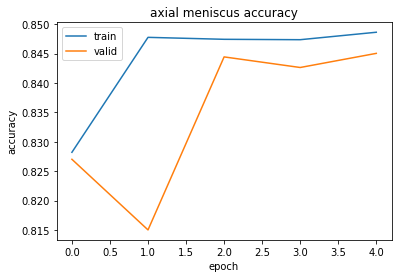

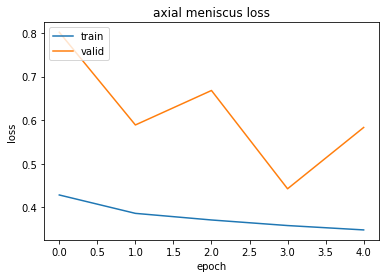

In [0]:
import matplotlib.pyplot  as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('coronal abnormal accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('axial meniscus loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

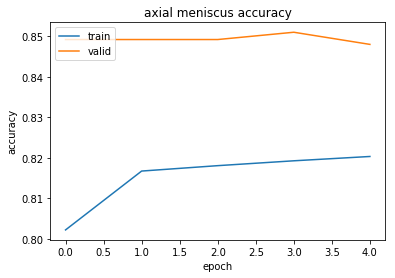

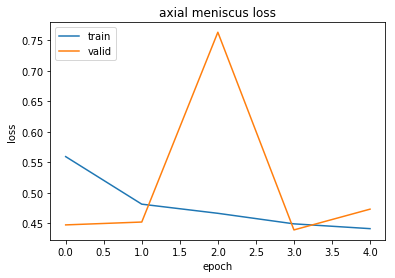

In [0]:
import matplotlib.pyplot  as plt
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('axial meniscus accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('axial meniscus loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

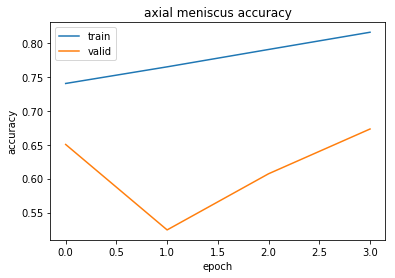

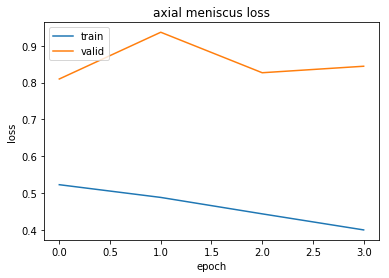

In [0]:
import matplotlib.pyplot  as plt
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('axial meniscus accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('axial meniscus loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Predictions of Validation set given ( Coronal )

In [0]:
#print(data1_test)
#print(y_test1)
print(len(Y_test1))


1749


In [0]:
#Loading the test data
#Prepare the test set
paths =[ "/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid/coronal/"
        ,"/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid/axial/","/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid/sagittal/"]
all_data2 = []
for path in paths:
  directory=[]
  for r, d, f in os.walk(path):
      f = np.sort(f)
      #print(len(f))
      for file in f:
          if '.npy' in file:
              directory.append(os.path.join(r, file))
  all_data2.append(directory)

#for j in range(len(all_data[0])):
def to_rgb(img,i):
    img = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA) 
#     print(img.shape)
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
#     print(img_rgb.shape)
    return img_rgb  
#coronal_test=np.zeros(shape=(16649,256,256,3),dtype='uint8')
coronalList=[]
test_sizes=[]
# axial=[]
k=0
# sagittal=[]
for i in range(0,len(all_data2[0])):
  print(i)
  a=np.load(all_data2[0][i])
  f,j,k=a.shape
  test_sizes.append(f//2)
  for j in range(f//2):
    b=to_rgb(a[j],i+j)
    coronalList.append(b)
  
    k+=1
    
coronal_test=np.asarray(coronalList,dtype='uint8')
coronalList=None
print("LEN: ",len(coronal_test))
    
#print(coronal_test.shape)
#cv2_imshow(coronal_test[0])

print("Done valid reading.")

#Loading test labels
#Test labels
import pandas as pd

data1_test = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid-abnormal.csv") 
data2_test = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid-acl.csv") 
data3_test = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid-meniscus.csv") 

print(data1_test.shape)
# print(data1.columns)
# print(data1['1'])
y_test1=np.array(data1_test["0"])
y_test2=np.array(data2_test["0"])
y_test3=np.array(data3_test["0"])
print("1: ",len(y_test1))
#print(y_test)
y_test1=np.hstack(('0',y_test1));y_test2=np.hstack(('0',y_test2));y_test3=np.hstack(('0',y_test3));
print("2: ",len(y_test2))
print("---------------------------------")

Y_test1=[];Y_test2=[];Y_test3=[];
for i in range(len(test_sizes)):
  for j in range(test_sizes[i]):
    Y_test1.append(y_test1[i])
    Y_test2.append(y_test2[i])
    Y_test3.append(y_test3[i])
 
Y_test1=np.asarray(Y_test1);Y_test2=np.asarray(Y_test2);Y_test3=np.asarray(Y_test3)
print("LENGHT: ",len(Y_test1))
#rint(Y_test)
# print(data1[:][1])
# labels=data1[1]
# print(labels)
Y_test_1=np.zeros(shape=(len(Y_test1),2));Y_test_2=np.zeros(shape=(len(Y_test2),2));Y_test_3=np.zeros(shape=(len(Y_test3),2))
for i in range(len(Y_test1)):
  if Y_test1[i] == '1':
    Y_test_1[i][1]=1
  elif Y_test1[i] == '0':
    Y_test_1[i][0]=1
  if Y_test2[i] == '1':
    Y_test_2[i][1]=1
  elif Y_test2[i] == '0':
    Y_test_2[i][0]=1
  if Y_test3[i] == '1':
    Y_test_3[i][1]=1
  elif Y_test3[i] == '0':
    Y_test_3[i][0]=1
      
#Y_train
Y_test_2

In [0]:
print(f)

17


In [0]:
coronal_model1.load_weights()

In [0]:
#Predict
preds1 = coronal_model1.evaluate(coronal_test, Y_test_1)
print ("Loss = " + str(preds1[0]))
print ("Test Accuracy = " + str(preds1[1]))

1749/1749 [==============================] - 9s 5ms/step
Loss = 0.7957430336456117
Test Accuracy = 0.8096054888507719


In [0]:
preds2 = coronal_model2.evaluate(coronal_test, Y_test_2)
print ("Loss = " + str(preds2[0]))
print ("Test Accuracy = " + str(preds2[1]))

1749/1749 [==============================] - 9s 5ms/step
Loss = 1.3259018974484138
Test Accuracy = 0.578616352286456


In [0]:
preds3 = coronal_model3.evaluate(coronal_test, Y_test_3)
print ("Loss = " + str(preds3[0]))
print ("Test Accuracy = " + str(preds3[1]))

1749/1749 [==============================] - 9s 5ms/step
Loss = 0.9641261137574656
Test Accuracy = 0.5883361921097771


# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
abnormal_reg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, Y_test_1)
acl_reg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, Y_test_2)
men_reg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, Y_test_3)